# Feature Seletion

In [19]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(url, names=names)

x = df.iloc[:, 0:8]
y = df.iloc[:, 8]

In [20]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Univariate Selection

### 1) Chi-squares test

In [21]:
# Univariate Statistical Test (Chi-squared for classfication)
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from IPython.display import display

In [22]:
selectKBest = SelectKBest(score_func=chi2, k=4)
feat = selectKBest.fit(x, y)
print(feat.scores_)

[ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]


In [23]:
feat = feat.transform(x)
feat[0:5, :]

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       [ 89. ,  94. ,  28.1,  21. ],
       [137. , 168. ,  43.1,  33. ]])

## 2. Recursive Feature Elimination

In [25]:
# Using the model accuracy to identify which attributes contribute the most the target attribute
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
lr_model = LogisticRegression()
rfe = RFE(lr_model, 4)

feat = rfe.fit(x, y)

print(feat.n_features_)
print(feat.support_)
print(feat.ranking_)

4
[ True  True False False False  True  True False]
[1 1 2 4 5 1 1 3]


In [28]:
names

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## 3. Principal Component Analysis

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
feat = pca.fit(x)

print(feat.explained_variance_ratio_)

[0.88854663 0.06159078 0.02579012 0.01308614]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]
 [-4.90459604e-02  1.19830016e-01 -2.62742788e-01  8.84369380e-01
  -6.55503615e-02  1.92801728e-01  2.69908637e-03 -3.01024330e-01]]


## 4. Feature Importance

### 1) Random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
plt.style.use('ggplot')

rf_model = RandomForestClassifier()
rf_model.fit(x, y)

rf_feat_importance = rf_model.feature_importances_
indices = np.argsort(rf_feat_importance)

Text(0.5,0,'Relative Importance')

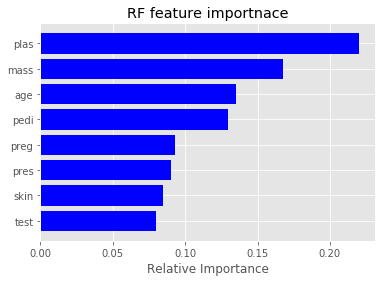

In [53]:
plt.title('RF feature importnace')
plt.barh(range(len(indices)), rf_feat_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), x.keys()[indices])
plt.xlabel('Relative Importance')

### 2) ExtraTreesClassifier

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier()
et_model.fit(x, y)

et_feat_importance = et_model.feature_importances_
indices = np.argsort(et_feat_importance)

Text(0.5,0,'Relative Importance')

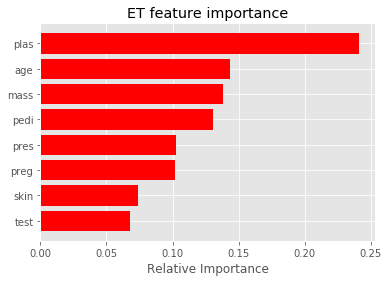

In [57]:
plt.title('ET feature importance')
plt.barh(range(len(indices)), et_feat_importance[indices], color='r', align='center')
plt.yticks(range(len(indices)), x.keys()[indices])
plt.xlabel('Relative Importance')